In [65]:
import numpy as np
train_f = "data/crime-train.txt"
test_f = "data/crime-test.txt"
def txt2arr(file_name):
    var_d = dict()
    with open(file_name) as f:
        arr = []
        lines = f.readlines()
        variables = lines[0].split("\t")
        for i in range(len(variables)):
            var_d[variables[i]] = i

        for l in lines[1:]:
            l = l.strip()
            arr.append([float(s) for s in l.split("\t")])
    return np.array(arr), var_d
training_data, var_d = txt2arr(train_f) 
testing_data, _ = txt2arr(test_f)

train_x = training_data[:, 1:]
train_y = training_data[:, 0]

test_x = testing_data[:, 1:]
test_y = testing_data[:, 0]
print(train_y.shape)
print(train_x.shape)

(1595,)
(1595, 95)


In [26]:
var_d

{'ViolentCrimesPerPop': 0,
 'population': 1,
 'householdsize': 2,
 'agePct12t21': 3,
 'agePct12t29': 4,
 'agePct16t24': 5,
 'agePct65up': 6,
 'numbUrban': 7,
 'pctUrban': 8,
 'medIncome': 9,
 'pctWWage': 10,
 'pctWFarmSelf': 11,
 'pctWInvInc': 12,
 'pctWSocSec': 13,
 'pctWPubAsst': 14,
 'pctWRetire': 15,
 'medFamInc': 16,
 'perCapInc': 17,
 'whitePerCap': 18,
 'blackPerCap': 19,
 'indianPerCap': 20,
 'AsianPerCap': 21,
 'HispPerCap': 22,
 'NumUnderPov': 23,
 'PctPopUnderPov': 24,
 'PctLess9thGrade': 25,
 'PctNotHSGrad': 26,
 'PctBSorMore': 27,
 'PctUnemployed': 28,
 'PctEmploy': 29,
 'PctEmplManu': 30,
 'PctEmplProfServ': 31,
 'PctOccupManu': 32,
 'PctOccupMgmtProf': 33,
 'MalePctDivorce': 34,
 'MalePctNevMarr': 35,
 'FemalePctDiv': 36,
 'TotalPctDiv': 37,
 'PersPerFam': 38,
 'PctFam2Par': 39,
 'PctKids2Par': 40,
 'PctYoungKids2Par': 41,
 'PctTeen2Par': 42,
 'PctWorkMomYoungKids': 43,
 'PctWorkMom': 44,
 'NumIlleg': 45,
 'PctIlleg': 46,
 'NumImmig': 47,
 'PctImmigRecent': 48,
 'PctImmi

In [25]:
print(train_y)

[-0.45 -0.45 -0.14 ...  0.81  0.18  1.12]


In [69]:
n, d = train_x.shape
m, _ = test_x.shape
w = np.zeros(d)

In [71]:


# TODO: regularization path
# it updates values column by column and each time use all data
import sys

reg_lambda_l = []

for k in range(d):
    reg_lambda = 2*np.abs(np.sum(train_x[:,k] *(train_y-np.average(train_y))   ,axis=0))
    reg_lambda_l.append(reg_lambda)
reg_lambda = max(reg_lambda_l)

reg_lambda0 = reg_lambda
print("max_lambda: ", reg_lambda)

# initialize lambda
num_nonzero_l = []
reg_lambda_l = []
reg_lambda_l.append(reg_lambda)

objective_val_l = []



w_updates = [np.zeros(d)] # initialize how much w_updates
w = w_updates[0]
squared_train_err_l = [np.sum(  (train_x.dot(w) + b - train_y)**2 )/n]
squared_test_err_l = [np.sum(  (test_x.dot(w) + b - test_y)**2 )/m]
# w_prev = np.zeros(d)
b_l = [(1/n)*np.sum( train_y - train_x.dot(w))]

solution_weights = [np.zeros(d)]




while reg_lambda > 1e-2:  # TODO
    max_update = sys.maxsize
    # initialize weight with solution of lambda_max
    if reg_lambda == reg_lambda0:
        w_prev = np.zeros(d)
    else:
        w_prev = w_updates[1]
    w = w_prev
    b = b_l[-1]

    while max_update >= 0.01: # condition for not converge
        # pre-compute a
        # as a is fixed and solely depends on X
        a = 2*np.sum(train_x**2, axis = 0)  # axis = 0 by default
    #     print(a.shape)
        for k in range(d):
            excluded_train_x = np.delete(train_x, k, axis = 1)
            excluded_w = np.delete(w, k)
            # calculate the cost
            c_k = 2*np.sum(train_x[:,k]*(train_y- (b+ excluded_train_x.dot(excluded_w))  )  )
            # update weights
            if c_k < -reg_lambda:
                w[k]= (c_k+reg_lambda)/a[k]
            elif c_k > reg_lambda:
                w[k] = (c_k- reg_lambda)/a[k]
            else:
                w[k] = 0
            
        # sanity check
        obj_val = np.sum(  (train_x.dot(w) + b - train_y)**2 )+ np.sum(reg_lambda * np.absolute(w))
        objective_val_l.append(obj_val)
        
        w_updates.append(np.array(w))  # append the updated w
        b = (1/n)*np.sum( train_y - train_x.dot(w))
        b_l.append(b)
#         print(w_updates)
#         print(b_l)
        if len(w_updates) > 2:  # TODO: maximum 
            print("w_updates ", len(w_updates))
#             print("w_update ", w - w_prev)
#             print("w_update: ", w_updates[-1]-w_updates[-3])
            max_update = np.max(w_updates[-1]-w_updates[-2])
            print("maximum update ",  max_update)
            if max_update == 0: # skip zero weight matrix
                break
        w_prev = w
        
      
    solution_weights.append(w)
    # keep track of number of nonzero for each solution
    num_nonzero = np.sum(w != 0)
    num_nonzero_l.append(num_nonzero)
    
    
    # error record
    squared_train_err = np.sum(  (train_x.dot(w) + b - train_y)**2 )/n
    squared_train_err_l.append(squared_train_err)
    squared_test_err = np.sum(  (test_x.dot(w) + b - test_y)**2 )/m
    squared_test_err_l.append(squared_test_err)
    
    # regularization lambda
    reg_lambda = reg_lambda*0.5
    reg_lambda_l.append(reg_lambda)
    print("new lambda: ", reg_lambda)

max_lambda:  541.4826026332288
w_updates  3
maximum update  0.0
new lambda:  270.7413013166144
w_updates  4
maximum update  0.01466467181739651
w_updates  5
maximum update  0.03690295837474994
w_updates  6
maximum update  0.006697994853228348
new lambda:  135.3706506583072
w_updates  7
maximum update  0.016040840574023014
w_updates  8
maximum update  0.01844666691932302
w_updates  9
maximum update  0.008124078784871605
new lambda:  67.6853253291536
w_updates  10
maximum update  0.014934888090977858
w_updates  11
maximum update  0.008319411633420554
new lambda:  33.8426626645768
w_updates  12
maximum update  0.005769480670990474
new lambda:  16.9213313322884
w_updates  13
maximum update  0.0053353651792986505
new lambda:  8.4606656661442
w_updates  14
maximum update  0.003181788537149493
new lambda:  4.2303328330721
w_updates  15
maximum update  0.0030909891774986223
new lambda:  2.11516641653605
w_updates  16
maximum update  0.0028998645810315964
new lambda:  1.057583208268025
w_update

In [23]:
# sanity check continue
count = 0
for i in range(1,len(objective_val_l)):
    if objective_val_l[i-1] < objective_val_l[i]:
        count += 1
print("number of wrong optimization: " , count)
print(objective_val_l)

number of wrong optimization:  0
[1600.8878999999656, 1600.887899435737, 1200.6659247178684, 1200.6659245768024, 700.3884560384013, 700.3884560031347, 375.2081014390674, 375.2081014302508, 193.8575190745004, 193.85751907229624, 98.49212662599187, 98.49212662544083, 49.636905085181354, 49.636905085043594, 24.91616298563703, 12.482509103580105, 6.247361454480449, 3.1252074529128238, 1.562985407874562, 0.7815881242918182, 0.39081791723454357, 0.19541492238943034, 0.09770895213775484]


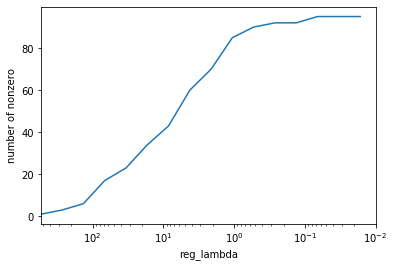

In [34]:
from matplotlib import pyplot as plt
reg_lambda_0 = max(reg_lambda_l)

plt.plot(reg_lambda_l[:-1], num_nonzero_l)
plt.xscale("log")
plt.xlim(reg_lambda_0, 1e-2) 
plt.xlabel("reg_lambda")
plt.ylabel("number of nonzero")
plt.savefig("A5a")
plt.show()

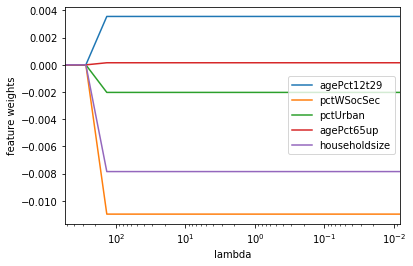

In [79]:
def get_feature_weight_update(ws, feature, var_d):
    feature_updates = [w[var_d[feature]] for w in ws]
    return feature_updates
    
var_d["agePct12t29"]

var_query = ["agePct12t29", "pctWSocSec", "pctUrban", "agePct65up","householdsize"]

feature1_updates = get_feature_weight_update(solution_weights, var_query[0], var_d)
feature2_updates = get_feature_weight_update(solution_weights, var_query[1], var_d)
feature3_updates = get_feature_weight_update(solution_weights, var_query[2], var_d)
feature4_updates = get_feature_weight_update(solution_weights, var_query[3], var_d)
feature5_updates = get_feature_weight_update(solution_weights, var_query[4], var_d)
plt.plot(reg_lambda_l, feature1_updates, label = "agePct12t29")
plt.plot(reg_lambda_l, feature2_updates, label = "pctWSocSec")
plt.plot(reg_lambda_l, feature3_updates, label = "pctUrban")
plt.plot(reg_lambda_l, feature4_updates, label = "agePct65up")
plt.plot(reg_lambda_l, feature5_updates, label = "householdsize")
plt.xlabel("lambda")
plt.ylabel("feature weights")
plt.xlim(reg_lambda_l[0], reg_lambda_l[-1])
plt.xscale("log")
plt.legend()
plt.savefig("A5b")
plt.show()

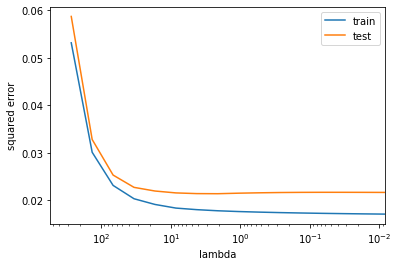

In [77]:

plt.plot(reg_lambda_l[1:], squared_train_err_l[1:], label = "train")
plt.plot(reg_lambda_l[1:], squared_test_err_l[1:], label = "test")
plt.xlim(reg_lambda_l[0], reg_lambda_l[-1]) # flip x axis
plt.xlabel("lambda")
plt.ylabel("squared error")
plt.xscale("log")
plt.legend()
plt.savefig("A5c")
plt.show()